## Purpose: Exploratory data analysis on tweets

**Charts:**

* Bubble Map
* Word Cloud
* Bar Charts
* Line Charts
* Tree Map

In [1]:
import sys
# !{sys.executable} -m pip install geocoder
# !{sys.executable} -m pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_excel('sample_cleaned.xlsx', index_col = 0)
df.head()

created_at                                              tweet  \
0 2020-10-15 00:00:20  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   
1 2020-10-15 00:00:22  #censorship #HunterBiden #Biden #BidenEmails #...   
2 2020-10-15 00:00:25  In 2020, #NYPost is being #censorship #CENSORE...   
3 2020-10-15 00:00:57  FBI Allegedly Obtained Hunter Biden Computer, ...   
4 2020-10-15 00:01:23  Comments on this? "Do Democrats Understand how...   

   likes  retweet_count  user_followers_count          user_location  \
0      0              0                  1536  Golden Valley Arizona   
1      1              0                   390        California, USA   
2      0              0                  1397      Chicago, Illinois   
3      0              0                   266          Kentucky, USA   
4      0              0                    83         Tampa, Florida   

         lat        long     city        country      continent       state  \
0  46.304036 -109.171431      NaN  United States  North America     Montana   
1  36.701463 -118.755997      NaN  United States  North America  California   
2  41.875562  -87.624421  Chicago  United States  North America    Illinois   
3  37.572603  -85.155141      NaN  United States  North America    Kentucky   
4  27.947760  -82.458444    Tampa  United States  North America     Florida   

  state_code tweet_lang                                          tweet_new  \
0         MT         en     this is how biden made his   trumpisnotamer...   
1         CA         en  censorship hunterbiden biden bidenemails biden...   
2         IL         en  in 2020  nypost is being censorship censored b...   
3         KY         en  fbi allegedly obtained hunter biden computer  ...   
4         FL         en  comments on this   do democrats understand how...   

                                         tweet_token     ds  
0     ['', 'biden', 'made', 'trumpisnotamerica', '']  biden  
1  ['censorship', 'hunterbiden', 'biden', 'bidene...  biden  
2  ['2020', 'nypost', 'censorship', 'censor', 'tw...  biden  
3  ['fbi', 'allegedli', 'obtain', 'hunter', 'bide...  biden  
4  ['comment', 'democrat', 'understand', 'ruthles...  biden

In [4]:
sample1 = pd.read_csv('sample_week1.csv')
sample1.head()

created_at                                              tweet  \
0  2020-10-19 23:12:12  Is it just me or does anyone else really doubt...   
1  2020-10-17 10:16:10  #Trump says he may leave the US if Biden wins....   
2  2020-10-19 10:00:04  @StephenKing You, @realDonaldTrump, a US presi...   
3  2020-10-18 17:14:19  Be prepared! We know #Democrats have saved the...   
4  2020-10-19 04:51:02  In "Edward Scissorhands", Johnny Depp only spo...   

   likes  retweet_count     user_id  user_followers_count    user_location  \
0      0              0 -2147483648                   960  Los Angeles, CA   
1      7              0    18080729                 21518     New York, NY   
2      0              1 -2147483648                   411    Littleton, CO   
3      5              4     9834992                 64658      Memphis, TN   
4      2              0   391503406                  3310        Utah, USA   

         lat        long         city        country      continent  \
0  34.053691 -118.242766  Los Angeles  United States  North America   
1  40.712728  -74.006015     New York  United States  North America   
2  39.613321 -105.016650          NaN  United States  North America   
3  35.149022  -90.051629      Memphis  United States  North America   
4  39.422519 -111.714358          NaN  United States  North America   

        state state_code tweet_lang  \
0  California         CA         en   
1    New York         NY         en   
2    Colorado         CO         en   
3   Tennessee         TN         en   
4        Utah         UT         en   

                                           tweet_new  \
0  is it just me or does anyone else really doubt...   
1  trump says he may leave the us if biden wins  ...   
2   you    a us president  said it  millions hear...   
3  be prepared  we know democrats have saved thei...   
4  in  edward scissorhands   johnny depp only spo...   

                                         tweet_token     ds  
0  ['anyon', 'el', 'realli', 'doubt', 'trump', 'c...  trump  
1  ['trump', 'say', 'may', 'leav', 'u', 'biden', ...  trump  
2  ['', 'u', 'presid', 'said', 'million', 'heard'...  trump  
3  ['prepar', 'know', 'democrat', 'save', 'disgus...  trump  
4  ['edward', 'scissorhand', 'johnni', 'depp', 's...  trump

In [5]:
sample2 = pd.read_csv('sample_week2.csv')
sample2.head()

created_at                                              tweet  \
0  2020-10-22 00:08:37  Opinion | Let’s not mince words. The Trump adm...   
1  2020-10-21 03:23:00  Can I #writein Baby Yoda for President #2020? ...   
2  2020-10-26 18:28:41  @SethAbramson #Trump fails to see why the stoc...   
3  2020-10-20 16:40:17  #Trump keeps telling you we've rounded the cor...   
4  2020-10-23 00:43:11  @kimbersaaa YUP! If you’re STILL undecided aft...   

   likes  retweet_count     user_id  user_followers_count  \
0      0              0   118058516                   881   
1      1              1 -2147483648                    10   
2      0              0 -2147483648                  3105   
3      0              0    30404055                   165   
4      0              1 -2147483648                  2050   

                user_location        lat        long      city        country  \
0                 New York NY  40.712728  -74.006015  New York  United States   
1                Portland, OR  45.520247 -122.674195  Portland  United States   
2                  California  36.701463 -118.755997       NaN  United States   
3           Orange County, CA  33.750038 -117.870493       NaN  United States   
4  New York, NY. L.E.S, Baby!  40.712728  -74.006015  New York  United States   

       continent       state state_code tweet_lang  \
0  North America    New York         NY         en   
1  North America      Oregon         OR         en   
2  North America  California         CA         en   
3  North America  California         CA         en   
4  North America    New York         NY         en   

                                           tweet_new  \
0  opinion   let s not mince words  the trump adm...   
1  can i writein baby yoda for president 2020    ...   
2   trump fails to see why the stock market he cl...   
3  trump keeps telling you we ve rounded the corn...   
4   yup  if you re still undecided after the last...   

                                         tweet_token     ds  
0  ['opinion', 'let', 'minc', 'word', 'trump', 'a...  trump  
1  ['writein', 'babi', 'yoda', 'presid', '2020', ...  trump  
2  ['', 'trump', 'fail', 'see', 'stock', 'market'...  trump  
3  ['trump', 'keep', 'tell', 'round', 'corner', '...  trump  
4  ['', 'yup', 'still', 'undecid', 'last', '4', '...  trump

In [6]:
sample3 = pd.read_csv('sample_week3.csv')
sample3.head()

created_at                                              tweet  \
0  2020-10-27 17:07:54  Wonder how long politicians like #EmmanuelMacr...   
1  2020-10-31 23:31:11  @realDonaldTrump Anti-Trump? PLEASE VOTE #Make...   
2  2020-10-27 22:36:01  For God's 🙏 sake. #Trump's wife can barely spe...   
3  2020-10-28 07:24:04  @RealDonalDrumpf @OperationMAGA Many people ar...   
4  2020-10-30 15:06:29  #Trump's likely to  contest election results i...   

   likes  retweet_count     user_id  user_followers_count  \
0      0              0   932320676                   162   
1      0              0 -2147483648                    89   
2      0              0    77080568                  1001   
3      1              0   306055499                  4853   
4      2              2    18229950                  1992   

         user_location        lat        long         city        country  \
0         planet Earth  34.233137 -102.410749          NaN  United States   
1         Berkeley, CA  37.870839 -122.272864     Berkeley  United States   
2  Annapolis, Maryland  38.978640  -76.492786    Annapolis  United States   
3      San Antonio, TX  29.424600  -98.495141  San Antonio  United States   
4     Washington, D.C.  38.894992  -77.036558   Washington  United States   

       continent                 state state_code tweet_lang  \
0  North America                 Texas         TX         en   
1  North America            California         CA         en   
2  North America              Maryland         MD         en   
3  North America                 Texas         TX         en   
4  North America  District of Columbia         DC         en   

                                           tweet_new  \
0  wonder how long politicians like emmanuelmacro...   
1   anti trump  please vote makeamericaunitedagai...   
2  for god s   sake  trump s wife can barely spea...   
3    many people are saying this is fakenews and ...   
4  trump s likely to  contest election results in...   

                                         tweet_token     ds  
0  ['wonder', 'long', 'politician', 'like', 'emma...  trump  
1  ['', 'anti', 'trump', 'plea', 'vote', 'makeame...  trump  
2  ['god', 'sake', 'trump', 'wife', 'bare', 'spea...  trump  
3  ['', 'mani', 'peopl', 'say', 'fakenew', 'anoth...  trump  
4  ['trump', 'like', 'contest', 'elect', 'result'...  trump

### Bubble Map: geospatial distribution of tweets

In [7]:
df_country = df.groupby('country').size().reset_index().rename(columns = {0: 'count'})
df_country

country  count
0            Afghanistan      3
1                Albania      1
2              Argentina      3
3                Armenia      1
4              Australia    179
..                   ...    ...
94  United Arab Emirates     17
95        United Kingdom    448
96         United States   5833
97             Venezuela      1
98               Vietnam      6

[99 rows x 2 columns]

In [8]:
import geocoder
def geocode(data):
    df = data.copy()
    for index, row in df.iterrows():
        g = geocoder.osm(row['country'])
        lat = g.osm['y']
        lng = g.osm['x']
        df.loc[index, 'lat'] = lat
        df.loc[index, 'lng'] = lng
    return df

In [9]:
df_new = geocode(df_country)
df_new.head()

country  count        lat         lng
0  Afghanistan      3  33.768006   66.238514
1      Albania      1  41.000028   19.999962
2    Argentina      3 -34.996496  -64.967282
3      Armenia      1  40.769627   44.673665
4    Australia    179 -24.776109  134.755000

In [10]:
df_continent = df[['country', 'continent']].drop_duplicates()
df_continent

country      continent
0           United States  North America
10         United Kingdom         Europe
21                 Poland         Europe
30                  China           Asia
32                  Spain         Europe
...                   ...            ...
6942  Trinidad and Tobago  North America
7199               Rwanda         Africa
7431               Panama  North America
7505               Kuwait           Asia
7761               Serbia         Europe

[102 rows x 2 columns]

In [11]:
df_continent[df_continent.duplicated(subset = 'country', keep = False)]

country continent
36     Egypt    Africa
40    Russia    Europe
247   Turkey      Asia
1845  Turkey    Europe
2007  Russia      Asia
6884   Egypt      Asia

In [12]:
#since there are duplicated countries due to different continent names, replace them
df_continent.loc[df_continent.country == 'Turkey', 'continent'] = 'Europe'
df_continent.loc[df_continent.country == 'Russia', 'continent'] = 'Europe'
df_continent.loc[df_continent.country == 'Egypt', 'continent'] = 'Africa'

In [13]:
df_continent.drop_duplicates(inplace = True)
df_continent

country      continent
0           United States  North America
10         United Kingdom         Europe
21                 Poland         Europe
30                  China           Asia
32                  Spain         Europe
...                   ...            ...
6942  Trinidad and Tobago  North America
7199               Rwanda         Africa
7431               Panama  North America
7505               Kuwait           Asia
7761               Serbia         Europe

[99 rows x 2 columns]

In [14]:
#merge in with geocoded data
df_new = df_new.merge(df_continent, on = 'country')
df_new.head()

country  count        lat         lng      continent
0  Afghanistan      3  33.768006   66.238514           Asia
1      Albania      1  41.000028   19.999962         Europe
2    Argentina      3 -34.996496  -64.967282  South America
3      Armenia      1  40.769627   44.673665           Asia
4    Australia    179 -24.776109  134.755000        Oceania

In [15]:
df_new.shape

(99, 5)

In [16]:
px.scatter_geo(df_new, lat = 'lat', lon = 'lng', size = 'count', 
               hover_name = 'country', projection = 'natural earth', color = 'continent')

### Word Cloud: most common terms in tweets

In [17]:
import ast 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # for word cloud

In [18]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["trump", "donaldtrump", "realdonaldtrump", "joe", "biden", "joebiden", "see",
                 "amp", "say", "one", "day", "let", "u", "still", "year", "go", "even", "give",
                 "think", "know", "show", "use", "via", "make", "look", "never", "watch",
                 "thing", "want", "take", "time", "win", "run", "come", "vote", "elect",
                 "story", "new", "need", "poll", "live", "man", "peopl", "presid", "polit",
                 "back", "call", "actual", "stop", "keep", "today", "much", "way", "said",
                 "stori", "s", "don", "t", "will", "president", "people"])

#### all tweets

In [19]:
flag_mask = np.array(Image.open("imgs/us_colors.jpeg"))
mask_colors = ImageColorGenerator(flag_mask)

flag_wordcloud = WordCloud(stopwords=stopwords, mask=flag_mask, 
                             mode="RGBA", background_color="white", max_words=500, 
                             max_font_size=256, random_state=42,
                             width=flag_mask.shape[1],
                             height=flag_mask.shape[0],
                             color_func=mask_colors)

In [20]:
tweets = ""

for x in df.head(8175)['tweet_new']:
    tweets += x
    
print ("There are {} words in the combination of all tweets.".format(len(tweets)))

There are 1344806 words in the combination of all tweets.


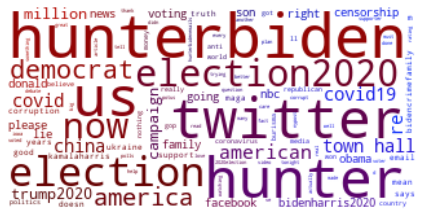

In [21]:
flag_wordcloud.generate(tweets)

plt.imshow(flag_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

plt.savefig("imgs/output/tweets_wordcloud.png", format="png")

sample 1

In [22]:
tweets = ""

for x in sample1.head(8175)['tweet_new']:
    tweets += x
    
print ("There are {} words in the combination of all tweets.".format(len(tweets)))

There are 1050912 words in the combination of all tweets.


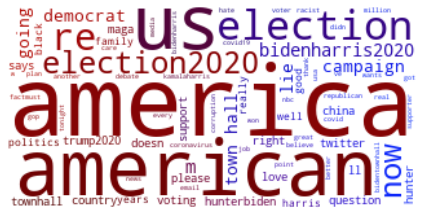

In [23]:
flag_wordcloud.generate(tweets)

plt.imshow(flag_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

plt.savefig("imgs/output/sample1_tweets_wordcloud.png", format="png")

sample 2

In [24]:
tweets = ""

for x in sample2.head(8175)['tweet_new']:
    tweets += x
    
print ("There are {} words in the combination of all tweets.".format(len(tweets)))

There are 932275 words in the combination of all tweets.


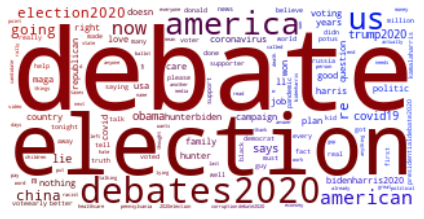

In [25]:
flag_wordcloud.generate(tweets)

plt.imshow(flag_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

plt.savefig("imgs/output/sample2_tweets_wordcloud.png", format="png")

sample 3

In [26]:
tweets = ""

for x in sample3.head(8175)['tweet_new']:
    tweets += x
    
print ("There are {} words in the combination of all tweets.".format(len(tweets)))

There are 847440 words in the combination of all tweets.


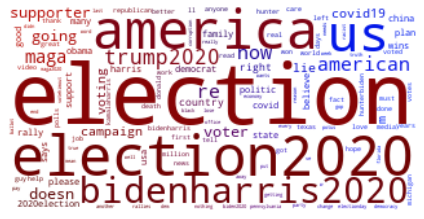

In [27]:
flag_wordcloud.generate(tweets)

plt.imshow(flag_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

plt.savefig("imgs/output/sample3_tweets_wordcloud.png", format="png")

#### trump

In [28]:
trump_mask = np.array(Image.open("imgs/trump.jpeg"))
mask_colors = ImageColorGenerator(trump_mask)

trump_wordcloud = WordCloud(stopwords=stopwords, mask=trump_mask, 
                             mode="RGBA", background_color="white", max_words=500, 
                             max_font_size=256, random_state=42,
                             width=trump_mask.shape[1],
                             height=trump_mask.shape[0],
                             color_func=mask_colors)

In [30]:
trump_tweets = ""

for x in df.head(4283)['tweet_new']:
    trump_tweets += x
    
print ("There are {} words in the combination of all trump tweets.".format(len(trump_tweets)))

There are 693040 words in the combination of all trump tweets.


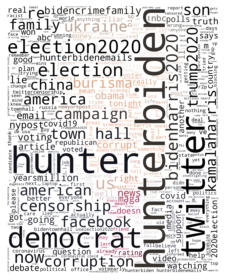

In [31]:
trump_wordcloud.generate(trump_tweets)

plt.imshow(trump_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

plt.savefig("imgs/output/trump_wordcloud.png", format="png")

sample 1

In [32]:
trump_tweets = ""

for x in sample1.head(4283)['tweet_new']:
    trump_tweets += x
    
print ("There are {} words in the combination of all trump tweets.".format(len(trump_tweets)))

There are 710776 words in the combination of all trump tweets.


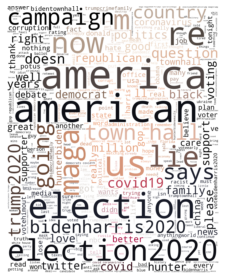

In [33]:
trump_wordcloud.generate(trump_tweets)

plt.imshow(trump_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

plt.savefig("imgs/output/sample1_trump_wordcloud.png", format="png")

#### biden

In [ ]:
biden_mask = np.array(Image.open("imgs/biden.jpeg"))
mask_colors = ImageColorGenerator(biden_mask)

biden_wordcloud = WordCloud(stopwords=stopwords, mask=biden_mask, 
                             mode="RGBA", background_color="white", max_words=500, 
                             max_font_size=256, random_state=42,
                             width=biden_mask.shape[1],
                             height=biden_mask.shape[0],
                             color_func=mask_colors)

In [ ]:
biden_tweets = ""

for x in df.head(4283)['tweet_new']:
    biden_tweets += " ".join(ast.literal_eval(x))
    
print ("There are {} words in the combination of all biden tweets.".format(len(biden_tweets)))

In [ ]:
biden_wordcloud.generate(biden_tweets)

plt.imshow(biden_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

plt.savefig("imgs/output/biden_wordcloud.png", format="png")

In [ ]:
## maybe can try word cloud on tweets 3 days before and after the election to see if there are more tweets about trump/biden

## Line Chart: to show tweet count for Trump/Biden

In [ ]:
trump1 = pd.read_excel('trump_week1.xlsx', index_col = 0)
trump1.head()

In [ ]:
trump2 = pd.read_excel('trump_week2.xlsx', index_col = 0)
trump2.head()

In [ ]:
trump3 = pd.read_excel('trump_week3.xlsx', index_col = 0)
trump3.head()

In [ ]:
biden1 = pd.read_excel('biden_week1.xlsx', index_col = 0)
biden1.head()

In [ ]:
biden2 = pd.read_excel('biden_week2.xlsx', index_col = 0)
biden2.head()

In [ ]:
biden3 = pd.read_excel('biden_week3.xlsx', index_col = 0)
biden3.head()

In [ ]:
trump1.dtypes

In [ ]:
## maybe can plot wordcloud across different weeks & see if theres any difference??